In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/application_train.csv


Загружаю файлы с данными

In [82]:
pd.options.display.max_columns = 200
app_train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [133]:
pd.options.display.max_columns = 200
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_log,AMT_CREDIT_log,TIME_TO_PAY_log,AMT_CREDIT_log_norm,AMT_INCOME_TOTAL_log_norm,TIME_TO_PAY_log_norm
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,12.218500,12.915581,0.946028,-0.215594,0.639536,0.672684
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,12.506181,14.072865,0.888673,1.402864,1.231993,-0.496822
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-1904

In [83]:
app_test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [84]:
sample_submission = pd.read_csv('/kaggle/input/home-credit-default-risk/sample_submission.csv')
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


Посмотрим верхнеуровнево на данные. Для начала узнаем, о каких признаках не хватает данных.

In [104]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [105]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Посмотрим, суолько вариантов имеют разные категориальные признаки

In [106]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Выберем из категориальных тот признак, в котором нет пропущенных значений и который нам нравится

In [8]:
#missed = app_train['FLAG_OWN_CAR'].isnull().sum()
#missed = app_test['FLAG_OWN_CAR'].isnull().sum()
#print(missed)

#missed = app_train['FLAG_OWN_REALTY'].isnull().sum()
#missed = app_test['FLAG_OWN_REALTY'].isnull().sum()
#print(missed)

missed = app_train['EXT_SOURCE_2'].isnull().sum()
print(missed)

660


# Сразу сделаем простейшую лог модель

In [108]:
#техническая ячейка кода
mis_val = app_test.isnull().sum()
print(mis_val)

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64


Параметр AMT_INCOME_TOTAL выглядит привлекательно. Посмотрим, как он распределён

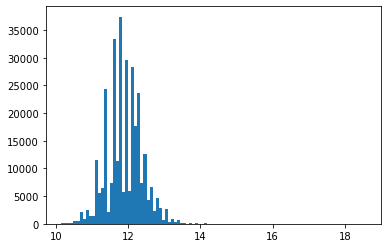

In [109]:
plt.hist(np.log1p(app_train['AMT_INCOME_TOTAL']),bins = 100)
plt.show()

А ещё посмотрим, как другой признак - AMT_CREDIT - распределён

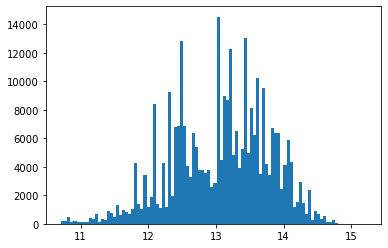

In [110]:
plt.hist(np.log1p(app_train['AMT_CREDIT']),bins = 100)
plt.show()

Решил использовать AMT_GOODS_PRICE после подсчёта IV. Дозаполню просто средними значениями пропуски, так как их немного

In [85]:
mean = app_train['AMT_GOODS_PRICE'].mean()
app_train['AMT_GOODS_PRICE'] = app_train['AMT_GOODS_PRICE'].fillna(mean)

mean = app_test['AMT_GOODS_PRICE'].mean()
app_test['AMT_GOODS_PRICE'] = app_test['AMT_GOODS_PRICE'].fillna(mean)

### Логарифмируем признаки, чтобы привести к нормальному распределению
Добавим столбцы с логарифмами рассмотренных признаков в нашу обучающую и тестовую выборку и уберём выбросы на глаз

In [86]:
app_train['AMT_INCOME_TOTAL_log'] = np.log1p(app_train['AMT_INCOME_TOTAL'])
app_train = app_train.loc[app_train['AMT_INCOME_TOTAL_log'] < 14] #убираю выбросы

app_test['AMT_INCOME_TOTAL_log'] = np.log1p(app_test['AMT_INCOME_TOTAL'])

app_train['AMT_CREDIT_log'] = np.log1p(app_train.loc[:,['AMT_CREDIT']])
app_test['AMT_CREDIT_log'] = np.log1p(app_test['AMT_CREDIT'])

app_train['AMT_GOODS_PRICE_log'] = np.log1p(app_train.loc[:,['AMT_GOODS_PRICE']])
app_test['AMT_GOODS_PRICE_log'] = np.log1p(app_test['AMT_GOODS_PRICE'])

Заполним пропущенные признаки EXT_SOURCE_2 средним значением этого признака

In [87]:
mean = app_train['EXT_SOURCE_2'].mean()
app_train['EXT_SOURCE_2'] = app_train['EXT_SOURCE_2'].fillna(mean)

mean = app_test['EXT_SOURCE_2'].mean()
app_test['EXT_SOURCE_2'] = app_test['EXT_SOURCE_2'].fillna(mean)

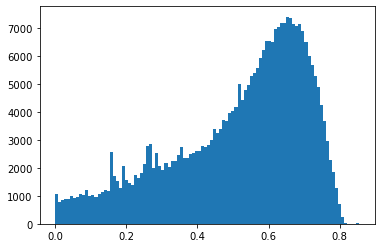

In [185]:
plt.hist(app_train['EXT_SOURCE_2'], bins = 100)
plt.show()

Делаем Encoding категориальных признаков

In [88]:
for col in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    le = preprocessing.LabelEncoder()
    le.fit(app_train[col])
    app_train[col] = le.transform(app_train[col])
    app_test[col] = le.transform(app_test[col])

Добавим ещё один признак, производный от первых двух:
    TIME_TO_PAY = AMT_INCOME_TOTAL_log/AMT_CREDIT_log

In [89]:
app_train['TIME_TO_PAY_log'] = app_train['AMT_INCOME_TOTAL_log']/app_train['AMT_CREDIT_log']
app_test['TIME_TO_PAY_log'] = app_test['AMT_INCOME_TOTAL_log']/app_test['AMT_CREDIT_log']

### Нормируем наши признаки**

In [90]:
scaler = preprocessing.StandardScaler()

In [91]:
scaler.fit(app_train[['AMT_CREDIT_log']])
app_train[['AMT_CREDIT_log_norm']] = scaler.transform(app_train[['AMT_CREDIT_log']])
app_test[['AMT_CREDIT_log_norm']] = scaler.transform(app_test[['AMT_CREDIT_log']])

scaler.fit(app_train[['AMT_INCOME_TOTAL_log']])
app_train[['AMT_INCOME_TOTAL_log_norm']] = scaler.transform(app_train[['AMT_INCOME_TOTAL_log']])
app_test[['AMT_INCOME_TOTAL_log_norm']] = scaler.transform(app_test[['AMT_INCOME_TOTAL_log']])

scaler.fit(app_train[['TIME_TO_PAY_log']])
app_train[['TIME_TO_PAY_log_norm']] = scaler.transform(app_train[['TIME_TO_PAY_log']])
app_test[['TIME_TO_PAY_log_norm']] = scaler.transform(app_test[['TIME_TO_PAY_log']])
#AMT_GOODS_PRICE
scaler.fit(app_train[['AMT_GOODS_PRICE_log']])
app_train[['AMT_GOODS_PRICE_log_norm']] = scaler.transform(app_train[['AMT_GOODS_PRICE_log']])
app_test[['AMT_GOODS_PRICE_log_norm']] = scaler.transform(app_test[['AMT_GOODS_PRICE_log']])

In [15]:
 
#plt.figure(figsize=(14,14))
#plt.scatter(app_train['AMT_INCOME_TOTAL_log'], app_train['AMT_CREDIT_log'], c = app_train['TARGET'], cmap = 'RdBu')
#plt.scatter(app_train['AMT_INCOME_TOTAL_log'], app_train['TARGET'])
#plt.xlabel('X0')
#plt.ylabel('X1')
#plt.show()

Encoding с One Hot Encoder

In [92]:
one_hot = pd.get_dummies(app_train['NAME_INCOME_TYPE'])
new_train = pd.concat([app_train,one_hot], axis = 1)
print(list(one_hot))

one_hot = pd.get_dummies(app_test['NAME_INCOME_TYPE'])
new_test = pd.concat([app_test,one_hot], axis = 1)
print(list(one_hot))

['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working']
['Businessman', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working']


In [93]:
new_train, new_test = new_train.align(new_test, join = 'inner', axis = 1)
new_train['TARGET'] = app_train['TARGET']

In [94]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

In [95]:
features = ['AMT_INCOME_TOTAL_log','AMT_CREDIT_log', 'TIME_TO_PAY_log', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
features_norm = ['AMT_INCOME_TOTAL_log_norm','AMT_CREDIT_log_norm', 'TIME_TO_PAY_log_norm', 
                 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE_log_norm']
new_f = features_norm + list(one_hot)
print(new_f)

['AMT_INCOME_TOTAL_log_norm', 'AMT_CREDIT_log_norm', 'TIME_TO_PAY_log_norm', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE_log_norm', 'Businessman', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working']


In [119]:
corr_matrix = app_train[features_norm].corr()
corr_matrix

,AMT_INCOME_TOTAL_log_norm,AMT_CREDIT_log_norm,TIME_TO_PAY_log_norm,FLAG_OWN_CAR,FLAG_OWN_REALTY
AMT_INCOME_TOTAL_log_norm,1.000000,0.421270,0.324543,0.225880,0.008672
AMT_CREDIT_log_norm,0.421270,1.000000,-0.719104,0.111383,-0.042861
TIME_TO_PAY_log_norm,0.324543,-0.719104,1.000000,0.057324,0.051387
FLAG_OWN_CAR,0.225880,0.111383,0.057324,1.000000,-0.002757
FLAG_OWN_REALTY,0.008672,-0.042861,0.051387,-0.002757,1.000000


In [194]:
new_train[new_f].isnull().sum()

AMT_INCOME_TOTAL_log_norm    0
AMT_CREDIT_log_norm          0
TIME_TO_PAY_log_norm         0
FLAG_OWN_CAR                 0
FLAG_OWN_REALTY              0
EXT_SOURCE_2                 0
Businessman                  0
Businessman                  0
Commercial associate         0
Commercial associate         0
Pensioner                    0
Pensioner                    0
State servant                0
State servant                0
Student                      0
Student                      0
Unemployed                   0
Unemployed                   0
Working                      0
Working                      0
dtype: int64

In [98]:
log_model = LogisticRegression(max_iter = 1000)
sgd_model = SGDClassifier(loss = 'log', penalty = 'elasticnet', max_iter = 1000)

#log_model.fit(app_train['AMT_INCOME_TOTAL_log','AMT_CREDIT_log'], app_train['TARGET'])
crosval = cross_val_score(log_model, new_train[new_f],  y = new_train['TARGET'], cv = 5, scoring= 'roc_auc')
print("log_model:",max(crosval), min(crosval))
crosval = cross_val_score(sgd_model, new_train[new_f],  y = new_train['TARGET'], cv = 5, scoring= 'roc_auc')
print("sgd_model:",max(crosval), min(crosval))

log_model: 0.6807335847556234 0.6761396073738594
sgd_model: 0.6805036566965909 0.6743538655871346


Значение без категориальных:
0.5508729933852835 0.5395368753534147

Значение с 1 категориальным: 
0.5498579735672917 0.5397679801169459

Значение с 2 категориальными: 
0.5507072040040448 0.5394478148688387

Когда добавил категориальный с несколькими категориями:

Когда добавил EXT_SOURCE_2:
0.6739632215180044 0.6673405819732986

Когда добавил после IV: 0.6807282753222949 0.6761396073738594

Поднял max_iter до 1000: 0.6807335847556234 0.6761396073738594

In [209]:
print(new_test.shape[1])
print(new_train.shape[1])

141
142


In [100]:
log_model.fit(new_train[new_f], new_train['TARGET'])
prediction = log_model.predict_proba(new_test[new_f])[:,1]
sample_submission['TARGET'] = prediction
print(prediction)
sample_submission.to_csv("submission10.csv", index = None)

[0.05566426 0.17458671 0.04485202 ... 0.04088938 0.08164544 0.09774032]


Займёмся WoE

In [34]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is \t" + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [36]:
iv, woe = iv_woe(data = new_train, target = 'TARGET', bins=10, show_woe = False)

TypeError: '>' not supported between instances of 'list' and 'float'

In [47]:
pd.options.display.max_rows = 100
print_iv = iv.loc[iv['IV'] > 0.03]

print(print_iv.sort_values(by = ['IV'], ascending=False))

                      Variable        IV
0                 EXT_SOURCE_3  0.410113
0                 EXT_SOURCE_1  0.347358
0                 EXT_SOURCE_2  0.306374
0                DAYS_EMPLOYED  0.101152
0              AMT_GOODS_PRICE  0.091989
0              OCCUPATION_TYPE  0.086209
0                   DAYS_BIRTH  0.084239
0            ORGANIZATION_TYPE  0.073420
0             NAME_INCOME_TYPE  0.058467
0  REGION_RATING_CLIENT_W_CITY  0.051270
0          NAME_EDUCATION_TYPE  0.050698
0                  OWN_CAR_AGE  0.050584
0         REGION_RATING_CLIENT  0.048392
0       DAYS_LAST_PHONE_CHANGE  0.046813
0                      Working  0.045376
0                   AMT_CREDIT  0.044945
0               AMT_CREDIT_log  0.044945
0          AMT_CREDIT_log_norm  0.044945
0                  CODE_GENDER  0.038740
0              DAYS_ID_PUBLISH  0.038509
0   REGION_POPULATION_RELATIVE  0.034591
0                FLOORSMAX_AVG  0.033768
0               FLOORSMAX_MEDI  0.033531
0               

In [106]:
#техническая ячейка кода
mis_val = app_train['DAYS_BIRTH'].isnull().sum()
print(mis_val)

0


In [107]:
app_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307353, dtype: int64

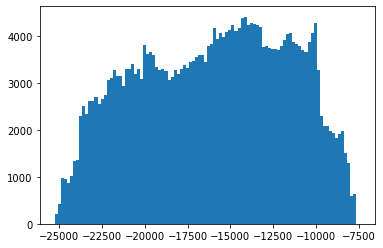

In [108]:
plt.hist(app_train['DAYS_BIRTH'], bins=100)
plt.show()

Построим график зависимости оценки метрики на лидерборде и на кроссвалидации

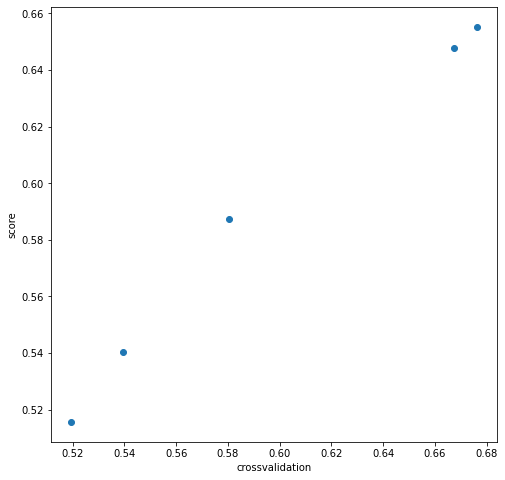

In [113]:
leaderbord_metric = [0.51565, 0.54025, 0.58722, 0.64793, 0.65532]
crossval_metric = [0.5193181596621683, 0.5394478148688387, 0.5805387959455369, 0.6673284975746747, 0.6761396073738594]

plt.figure(figsize= (8,8))
plt.scatter(crossval_metric, leaderbord_metric)
plt.xlabel('crossvalidation')
plt.ylabel('score')
plt.show()